In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# DATA INPUT & SPLIT

In [2]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [3]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data1 = data
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


data_train = data[:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
#_,m_train = X_train.shape


# Forward propagation

$Z^{[1]} = W^{[1]} X + b^{[1]}$

$A^{[1]} = ReLU(Z^{[1]}))$

$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$

$A^{[2]} = softmax(Z^{[2]})$

# Backward propagation

$Loss = - \Sigma[{y_{[k]} *log(a_{[k]})]}$

$Cost = - \frac{1}{m}\Sigma\Sigma[{y_{[k]} *log(a_{[k]})]}$

$dZ^{[2]} = A^{[2]} - Y$  : Derivative of Loss Function with respect to Z

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$ : Derivative of Cost Function with respect to W

$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$


# Updating Parameters

$alpha  : learning rate$

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

In [4]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z), 0)
    

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

#cost function
def cost_function(A2,one_hot_Y):
    m = Y.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A2))
    return cost


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1       # for every observation(row), access to the column specified by the label in Y
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    

def deriv_ReLU(Z):
    return Z>0
    
    
def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    #m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



    

# Performance

In [5]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def get_predictions(A2):
    return np.argmax(A2, 0)

def gradient_descent(X, Y, alpha,iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 20 == 0:
            print('Iterations : ', i)
            print('Accuracy : ', get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2

# Train & Test

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 500)

Iterations :  0
[2 7 6 ... 9 2 7] [1 8 4 ... 3 4 8]
Accuracy :  0.06576190476190476
Iterations :  20
[1 4 4 ... 8 4 0] [1 8 4 ... 3 4 8]
Accuracy :  0.29892857142857143
Iterations :  40
[1 4 4 ... 1 4 0] [1 8 4 ... 3 4 8]
Accuracy :  0.4949047619047619
Iterations :  60
[1 9 4 ... 1 4 0] [1 8 4 ... 3 4 8]
Accuracy :  0.6053333333333333
Iterations :  80
[1 9 4 ... 1 4 0] [1 8 4 ... 3 4 8]
Accuracy :  0.667
Iterations :  100
[1 9 4 ... 1 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.7055
Iterations :  120
[1 9 4 ... 1 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.7353809523809524
Iterations :  140
[1 9 4 ... 3 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.7567619047619047
Iterations :  160
[1 8 4 ... 3 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.7736428571428572
Iterations :  180
[1 8 4 ... 3 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.7877142857142857
Iterations :  200
[1 8 4 ... 3 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.7997619047619048
Iterations :  220
[1 8 4 ... 3 4 8] [1 8 4 ... 3 4 8]
Accuracy :  0.8096904761904762
Iteration

Prediction:  [6]
Label:  2


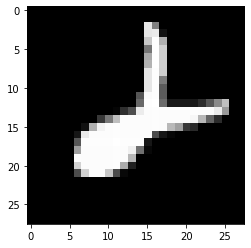

Prediction:  [8]
Label:  8


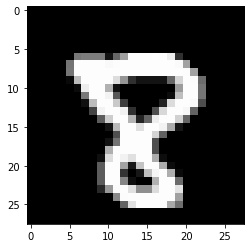

Prediction:  [6]
Label:  6


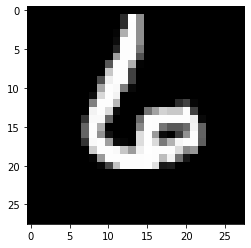

Prediction:  [7]
Label:  7


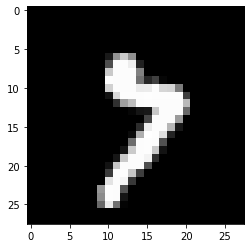

Prediction:  [9]
Label:  9


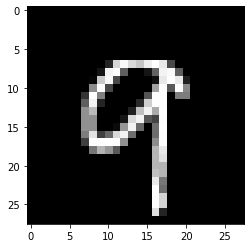

Prediction:  [0]
Label:  0


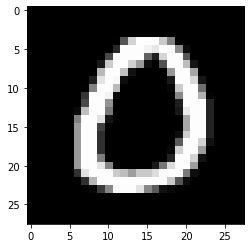

Prediction:  [9]
Label:  7


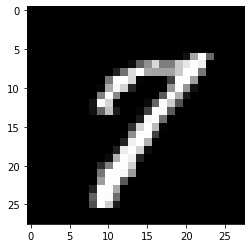

In [8]:
test_prediction(37, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(34, W1, b1, W2, b2)
test_prediction(24, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(97, W1, b1, W2, b2)

# Limitations

1. Few number of layers - it may have performed better with more hidden layers.

2. Parameters(weights) Initialization - the optimal value depends on the initial value of W.

3. Vanishing Gradient - vanishing gradient may have led to lack of training, even though the training dataset was large enough.